# Phys481 notes - Automata and Life

    au·tom·a·ton
    noun
    plural noun: automata

     +a moving mechanical device made in imitation of a human being.
    synonyms:	robot, android, cyborg, droid, bot
    "assembly-line automatons"

     +a machine that performs a function according to a predetermined set of coded instructions, 
     especially one capable of a range of programmed responses to different circumstances.
    
    used in similes and comparisons to refer to a person who seems to act in a mechanical or unemotional way.

## State evolution and transition
https://physics.stackexchange.com/questions/223564/what-is-a-state-in-physics

Informally speaking, a complete description of a physical system is referred to as its `state`. A complete state of a system provides all the possible information that can be observed about the system, i.e. everything that can be known about the system is contained in the specification of its state.

Every physical theory is ultimately based on the three kinds of fundamental postulates:

        postulates which defines the way we describe a state of a system.
        
        postulates which specifies what kind of information about observables, i.e. measurable properties of the system, is contained in the description of its state.

        postulates which provides us with laws that govern the time evolution of the system and allows us to predict its future state given the current one.

### One bit

The simplest non-trivial system has a binary state which can be fully specified using a single bit.  Assume that the state can always be correctly determined by applying some error-free measurement process. For a continuous time system the rate of change may have the form

  $$ \frac{d\Phi}{dt} = D\left( \Phi, t \right) $$
  
while a discrete time system may be described in terms of transitions from one state to the next
  
  $$ \Phi_{i+1} = T\left( \Phi_i \right) $$  

In [1]:
# The least interesting rule: don't change.
# A system in state "0" remains in state "0", 
# and state "1" remains in state "1"
#
# 0 -> 0
# 1 -> 1

# One way to accomplish this is with a function
#
def transition_0_1(state):
    """
    """
    return state

# An alternative approach is to define a dict and use it as a "lookup table"
# to determine what new state we end up in.
#
lookup = {0:0, 1:1}

print( 'state 0 transitions to state', lookup[0])

state = 0
for indx in range(5):
    print( state, end=' -> ' )
    state = lookup[state]

state 0 transitions to state 0
0 -> 0 -> 0 -> 0 -> 0 -> 

A system with 2 possible initial states and 2 final states can exhibit 4 different kinds of behavior

       1)  no change: 0 -> 0, 1 -> 1
       2)  always on: 0 -> 1, 1 -> 1
       3)  always off: 0 -> 0, 1 -> 0
       4)  alternate: 0 -> 1, 1 -> 0   
   

In [3]:
# Print all possible binary transitions for both initial conditions.
#
all_transitions = [ {0:0, 1:1}, {0:0, 1:0}, {0:1, 1:1}, {0:1, 1:0} ]  

for lookup in all_transitions: 
    print( '\n', lookup )
    for state in [0,1]:
        for indx in range(5):
            print( state, end=' -> ' )
            state = lookup[state]
        print(' ')


 {0: 0, 1: 1}
0 -> 0 -> 0 -> 0 -> 0 ->  
1 -> 1 -> 1 -> 1 -> 1 ->  

 {0: 0, 1: 0}
0 -> 0 -> 0 -> 0 -> 0 ->  
1 -> 0 -> 0 -> 0 -> 0 ->  

 {0: 1, 1: 1}
0 -> 1 -> 1 -> 1 -> 1 ->  
1 -> 1 -> 1 -> 1 -> 1 ->  

 {0: 1, 1: 0}
0 -> 1 -> 0 -> 1 -> 0 ->  
1 -> 0 -> 1 -> 0 -> 1 ->  


## Part 1d: Cellular automata

Read at least the first link:

    https://en.wikipedia.org/wiki/Cellular_automaton

    http://natureofcode.com/book/chapter-7-cellular-automata
    
    https://plato.stanford.edu/entries/cellular-automata/index.html

in order to understand how to construct, calculate, and classify basic 1-dimensional "Wolfram" automata.

[Task \#1.1] Write a program to generate a sequence for a 1-dimensional automaton with $N=64$ grid cells and arbitrary rules eg.

    ncells = 64
    state = np.zeros(ncells, dtype=np.int8 ) 
    state[ncells//2] = 1  # initialize one cell near the middle
  
    nsteps = 999
    for i in range(1,nsteps):
        state = cellular_step( state, rule=18)

[Task \#1.2]  Determine which 5 rules appear to be most random by estimating steady-state entropy after taking many (50+) "warm-up" or "burn-in" steps.

[Task \#1.3]  Write a function to generate a pseudorandom sequence of 64-bit integers based on a cellular automaton using the highest entropy rule.
  
Optional: read more about other examples and applications of cellular automata:  
  
    https://en.wikipedia.org/wiki/Nagel%E2%80%93Schreckenberg_model
  
    http://mathworld.wolfram.com/WireWorld.html    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

#import seaborn as sns
#sns.set(palette="bright")

### decimal to binary

There are several different ways of converting a decimal integer into a binary representation.  Perhaps the most obvious is "np.unpackbits" which returns a list of 0's and 1's.  The "np.binary_repr" function returns a string, as does "str.format" and the built-in "bin" function (although more work may be required to ensure leading 0's).

In the unlikely event that this operation becomes a computational bottleneck, we should probably use the "bin" method.  

Note: converting a string to a list of individual characters can be done with something like this:

        blist = []*len(s)           # make a list of empty elements
        for i,b in enumerate(s):
            blist[-i] = b

or:

        blist = []
        for b in s[::-1]:
            blist.append(b)

or:

        blist = [b for b in s][::-1] 

In [5]:
rule_number = 110
dec2bin = lambda x: np.unpackbits( np.uint8(x) )
print( dec2bin(rule_number) ) 
%timeit [dec2bin(rule_number) for rule_number in range(256)]

[0 1 1 0 1 1 1 0]
440 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
dec2bin = lambda x: np.binary_repr(x, width=8)
print( dec2bin(rule_number) ) 
%timeit [dec2bin(rule_number) for rule_number in range(256)]

01101110
214 µs ± 469 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
dec2bin = lambda x: '{:08b}'.format(x)
print( dec2bin(rule_number) ) 
%timeit [dec2bin(rule_number) for rule_number in range(256)]

01101110
93.1 µs ± 856 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
dec2bin = lambda x:  bin(rule_number)
print( dec2bin(rule_number) ) 
%timeit [dec2bin(rule_number) for rule_number in range(256)]

0b1101110
39.1 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
dec2bin = lambda x:  bin(rule_number)[2:].zfill(8)
print( dec2bin(rule_number) ) 
%timeit [dec2bin(rule_number) for rule_number in range(256)]

01101110
76.7 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 3-bit lookup

Working with 1-dimensional "Wolfram-type" CA requires that we use 3-bits (left,middle,right) to determine the outcome of applying a given rule.

One way is to use a "dict" indexed by a tuple containing the three bits.  Another would be to convert the tuple into an integer in the range 0-7 and use that to index a list. Perhaps the simplest and fastest approach is based on numpy array indexing, which is shown in more detail below.

In [10]:
blist = np.unpackbits( np.uint8(rule_number) )

truple = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]

# we can generate an index to go with each value of a loop
#
lookup_dict = {}
for indx,lmr in zip(range(8),truple):
    lookup_dict[lmr] = blist[indx]

# or use enumerate to do the same thing automatically
#
lookup_dict = {}
for indx,lmr in enumerate(truple):
    lookup_dict[lmr] = blist[indx]


%timeit x = [ lookup_dict[i] for i in truple]
print([ lookup_dict[i] for i in truple] )

600 ns ± 2.18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
[0, 1, 1, 0, 1, 1, 1, 0]


In [11]:
blist = np.unpackbits( np.uint8(rule_number) )

lookup_list = [None]*8
for indx in range(8):
    lookup_list[indx] = blist[indx]
    
%timeit [lookup_list[i] for i in range(8)]

672 ns ± 6.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
blist = np.unpackbits( np.uint8(rule_number) )
lookup_array = np.array( blist, dtype=np.uint8 )
indx = np.arange(8,dtype=np.uint8)

%timeit x = [blist[i] for i in indx]
%timeit x = [lookup_array[i] for i in indx]
%timeit x = lookup_array[indx]

1.91 µs ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.93 µs ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
801 ns ± 2.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### numpy array indexing

We can select individual elements from a list

    list( [1,2,3,3] ) [1]
    
or a range of elements

    list( [1,2,3,3] ) [1:3]
    
Numpy arrays can be acessed in the same way.  However, there are some other ways to select elements. Using a list or array of index values will result in a new array that is the same size as the index.  Each element will be the corresponding element of the original array. 

In [14]:
x = range(9) ; print(x)
print(x[0])
# print(x[0,2])
# print(x[ [0,2] ])

x = np.array(range(9)) ; print(x)
print(x[0])
#print(x[0,2])
print(x[ [0,2] ])
print(x[ [0,2,6,7] ])
print(x[ [0,2,0,4,0,6,0,8] ])

range(0, 9)
0
[0 1 2 3 4 5 6 7 8]
0
[0 2]
[0 2 6 7]
[0 2 0 4 0 6 0 8]


## Example: cellular automata single step

In [15]:
def cellular_step(value, rule_number=110):
    """You are welcome to use this code, but you must explain
    how it works.  Otherwise you will need to write your own.
    
    Debugging is twice as hard as writing the code in the first place. 
    Therefore, if you write the code as cleverly as possible, you are, 
    by definition, not smart enough to debug it.
    https://www.linusakesson.net/programming/kernighans-lever/index.php    
    """
    lookup = np.unpackbits( np.uint8(rule_number) )[::-1]
    triple = np.roll(value,+1)*4 + value*2 + np.roll(value,-1)
    
    return lookup[triple]

## Example: cellular automata

Text(0.5, 1.0, 'CA rule 110')

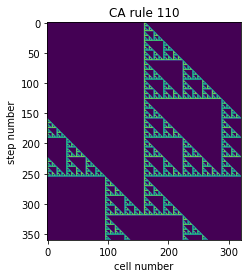

In [16]:
value = np.zeros(320, dtype=np.int8)
value[ len(value)//2 ] = 1

nsteps = 360
grid = np.ndarray( [nsteps, len(value)], dtype=np.int8)
for n in range(nsteps):
    value = cellular_step(value, rule_number=60)
    grid[n,:] = value
    
plt.imshow(grid)
plt.grid(False)
plt.xlabel('cell number')
plt.ylabel('step number')
plt.title('CA rule 110')

In [17]:
# the '%prun' magic ipython command runs a profiler to obtain run times 
# for a function and all of the functions it calls and so on.  Note that 
# unlike '%timeit' the main command is only called once.  Since results 
# may not be very accurate for very fast functions, it may be helpful to
# apply to a loop of tens, or hundreds, or thousands of calls.
#
nsteps = 9999
%prun for n in range(nsteps): value = cellular_step(value, rule_number=60)

## Part 2d: The game of life

Read this Wikipedia page: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

Read the python file in D2L: phys481_game-of-life.py
and work your way through different implementations of the algorithm in stepper0, stepper1...
and play around with the results.

[Task \#2.1] Examine the steady-state (long time) behaviour for an initial configuration with 1/2 the cells randomly turned on ($p=0.5$).
Calculate mean & standard deviation for at least 3 runs to estimate uncertainty.

[Task \#2.2] Examine the steady-state behaviour for a range of initial random densities from $p=0$ to $p=1$.

## import resources

The "import" command loads collections of code that are not part of the core python distribution.  We have used this to obtain plotting tools from matplotlib.pyplot and numerical tools from numpy.

For example, assume that the file "phys481_game_of_life.py" contains a bunch of useful python code.  Calling the import command will execute all the code in that file exactly as if we ran it from a Jupyter cell.  This can be used to define functions without displaying large amounts of code in the notebook and resulting documents.

In [18]:
import phys481_game_of_life as lifelib
print( lifelib.stepper0 )

from phys481_game_of_life import stepper0 as myteststepper
print( myteststepper )

included by:  FrameInfo(frame=<frame at 0x000001CA2BC96170, file '<frozen importlib._bootstrap>', line 219, code _call_with_frames_removed>, filename='<frozen importlib._bootstrap>', lineno=219, function='_call_with_frames_removed', code_context=None, index=None)
<function stepper0 at 0x000001CA2D60F4C0>
<function stepper0 at 0x000001CA2D60F4C0>


## \_\_name\_\_ == \_\_main\_\_

Calling "import" will automatically execute everything in a python file, even if we only want to import a single function.  Sometimes this is inconvenient.  For example, when writing and debugging a library we might want to run some tests or generate some plots to confirm that everything is working correctly.  However, some other user may want to import our library without running our diagnostic code.

One way to accomplish this might be to have some comments containing the test code.  We could uncomment it whenever we want to check that everything is okay, then turn it back into a comment when we were done.  This is a bit tedious and could cause problems if the code was imported while we were working on it.

A better solution is to check whether the file is being run directly or as part of an import command.  This can be done by looking at the \_\_name\_\_ system variable which will only be set to \_\_main\_\_ if the file is *not* being imported.

In [19]:
# The ipython %load magic command will import code and also show it in a notebook code cell.
#
# %load -s stepper0 phys481_game_of_life.py
def stepper0(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all pixels in grid, and over all neighbors (very slow)
    """
    
    nx, ny = grid.shape
    xx, yy =  np.arange(nx), np.arange(ny) 
    newgrid = grid.copy()
    
    for x in xx:
        for y in yy:
            
            nnear = 0  # count number of neighbors
            
            for dx in [-1,0,1]:
                for dy in [-1,0,1]:
                    if (dx!=0 or dy!=0):  # don't include the cell itself
                        nnear += grid[ (x+dx)%nx, (y+dy)%ny ]

            # dead cells with three live neighbours become live cells
            if (grid[x,y] == 0):
                if nnear == 3:
                    newgrid[x,y]=1

            # live cells with fewer than two or more than 3 live neighbors die
            else:
                if nnear < 2:
                    newgrid[x,y]=0
                if nnear >3 :
                    newgrid[x,y]=0
                                                            
    return newgrid


In [20]:
print( __name__ )

__main__


C:\Users\bjackel\Dropbox\teach\physx81\phys481\jupyter\phys481_game_of_life.py:243: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


(<matplotlib.image.AxesImage at 0x1ca2d712220>,)

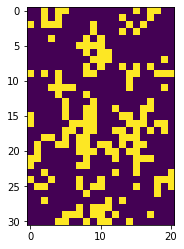

In [21]:
import phys481_game_of_life as mylife
#from phys481_game_of_life import LifeGrid

test = mylife.LifeGrid()
test.step()
test._animate_init() 
#for i in range(9):
#    test._animate_step()

In [22]:
dir( test )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_animate_init',
 '_animate_step',
 'animate_HTML',
 'ax',
 'fig',
 'grid',
 'plt',
 'step',
 'stepnum']

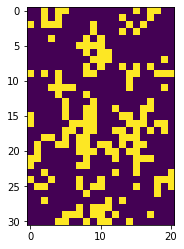

In [23]:
plt.imshow( test.grid )

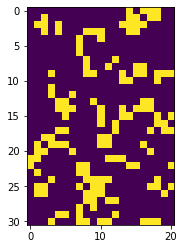

In [24]:
test.step() ; plt.imshow(test.grid )